In [1]:
import pandas as pd
import os
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pwd

'/home/jupyter/ML Final'

In [3]:
#bucket = !gsutil ls gs://msca_ivy_ml/Data/Images

In [4]:
#len(bucket)

In [5]:
#gsutil -m cp -r gs://msca_ivy_ml/Data/Images '/home/jupyter/ML Final'

### <strong>Check data</strong>

In [6]:
df_all = pd.read_csv('data.csv', index_col = 0)
df_all.head()

bmi  gender  is_training       name
0  34.207396    Male            1  img_0.bmp
1  26.453720    Male            1  img_1.bmp
2  34.967561  Female            1  img_2.bmp
3  22.044766  Female            1  img_3.bmp
4  37.758789  Female            1  img_4.bmp

In [7]:
file_list = os.listdir('/home/jupyter/ML Final/Images')
len(file_list)

3963

### <strong>EDA</strong>

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4205
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bmi          4206 non-null   float64
 1   gender       4206 non-null   object 
 2   is_training  4206 non-null   int64  
 3   name         4206 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 164.3+ KB


In [9]:
df_all.isnull().sum()

bmi            0
gender         0
is_training    0
name           0
dtype: int64

In [10]:
df_all.nunique()

bmi            1861
gender            2
is_training       2
name           4206
dtype: int64

### <strong>Clean dataframe</strong>

In [11]:
missing_filenames = set(df_all['name']).difference(file_list)
len(missing_filenames)

244

In [12]:
df_all = df_all[~df_all['name'].isin(missing_filenames)]

df_all.to_csv('updated_data.csv', index=False)


In [13]:
df_all.shape

(3962, 4)

##### <strong><em>Define sub-dataframes for better analysis</em></strong>


In [14]:
df_male = df_all[df_all['gender'] == 'Male'].reset_index(drop = True)
df_female = df_all[df_all['gender'] == 'Female'].reset_index(drop = True)

In [15]:
df_train = df_all[df_all['is_training'] == 1].reset_index(drop = True)
df_test = df_all[df_all['is_training'] == 0].reset_index(drop = True)

### <strong>Create visualizations</strong>


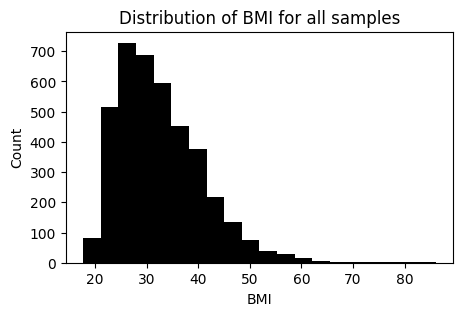

In [24]:
fig, ax = plt.subplots(figsize=(5, 3))

plt.hist(df_all['bmi'], bins=20, color = 'k')
plt.title('Distribution of BMI for all samples')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

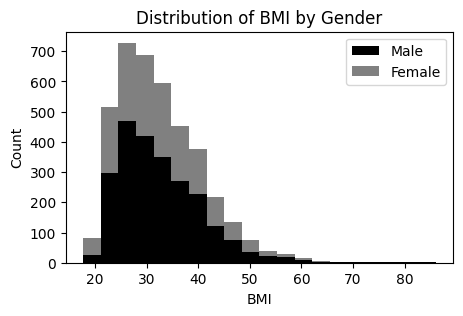

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))

males_bmi = df_male['bmi']
females_bmi = df_female['bmi']
plt.hist([males_bmi, females_bmi], bins=20, stacked=True, label=['Male', 'Female'], color = ['k','grey'])
plt.title('Distribution of BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

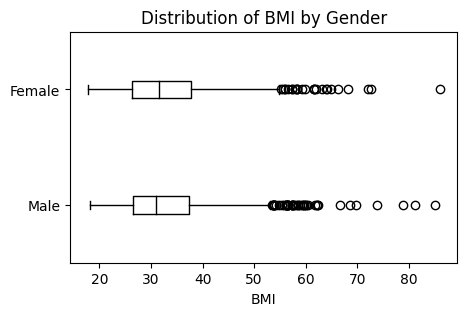

In [27]:
fig, ax = plt.subplots(figsize=(5, 3))

plt.boxplot([males_bmi, females_bmi], labels=['Male', 'Female'], vert = False, medianprops=dict(color='k'),
                                                                                boxprops=dict(color='k'), 
                                                                                whiskerprops=dict(color='k'), 
                                                                                capprops=dict(color='k'), 
                                                                                flierprops=dict(markeredgecolor='k'))
plt.title('Distribution of BMI by Gender')
plt.xlabel('BMI')
plt.show()

##### <strong><em>Visualizations for train and test set</em></strong>


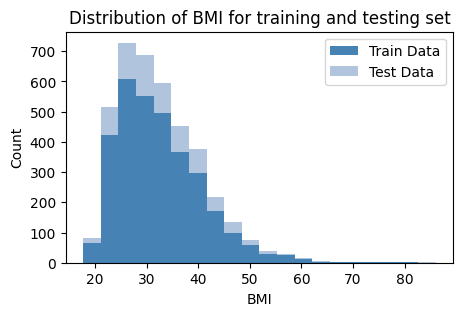

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))

train_bmi = df_train['bmi']
test_bmi = df_test['bmi']
plt.hist([train_bmi, test_bmi], bins=20, stacked=True, label=['Train Data', 'Test Data'], color = ['steelblue','lightsteelblue'])
plt.title('Distribution of BMI for training and testing set')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

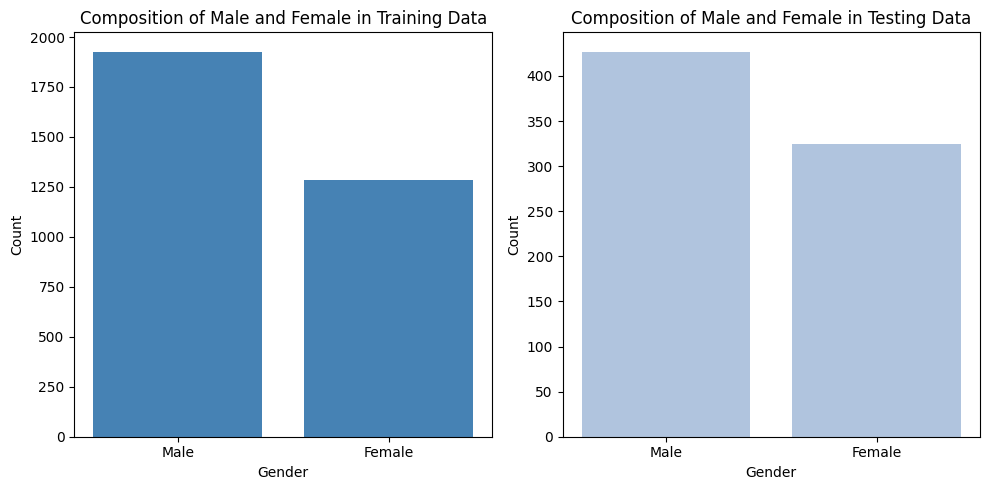

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

train_male_count = df_train[df_train['gender'] == 'Male'].shape[0]
train_female_count = df_train[df_train['gender'] == 'Female'].shape[0]

test_male_count = df_test[df_test['gender'] == 'Male'].shape[0]
test_female_count = df_test[df_test['gender'] == 'Female'].shape[0]

train_gender_counts = [train_male_count, train_female_count]
test_gender_counts = [test_male_count, test_female_count]

gender_labels = ['Male', 'Female']

ax1.bar(gender_labels, train_gender_counts, color='steelblue')
ax1.set_title('Composition of Male and Female in Training Data')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

ax2.bar(gender_labels, test_gender_counts, color='lightsteelblue')
ax2.set_title('Composition of Male and Female in Testing Data')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

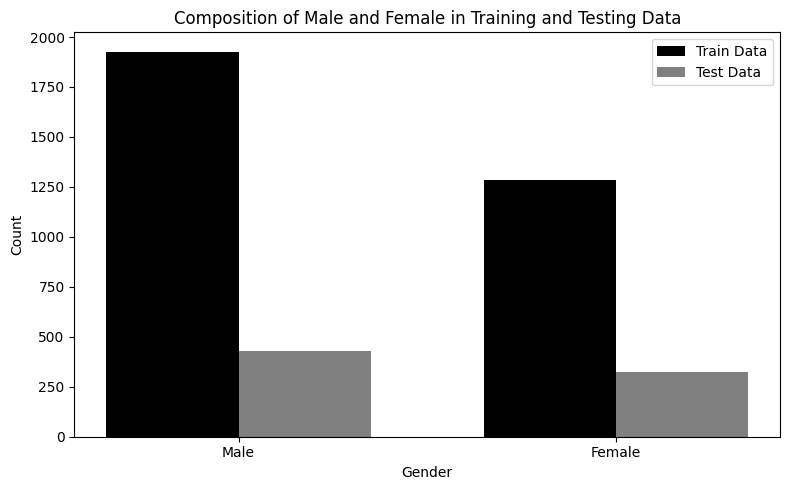

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

train_male_count = df_train[df_train['gender'] == 'Male'].shape[0]
train_female_count = df_train[df_train['gender'] == 'Female'].shape[0]

test_male_count = df_test[df_test['gender'] == 'Male'].shape[0]
test_female_count = df_test[df_test['gender'] == 'Female'].shape[0]

train_gender_counts = [train_male_count, train_female_count]
test_gender_counts = [test_male_count, test_female_count]

gender_labels = ['Male', 'Female']
bar_width = 0.35
index = np.arange(len(gender_labels))

ax.bar(index, train_gender_counts, bar_width, color='k', label='Train Data')
ax.bar(index + bar_width, test_gender_counts, bar_width, color='grey', label='Test Data')

ax.set_title('Composition of Male and Female in Training and Testing Data')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(gender_labels)
ax.legend()

plt.tight_layout()
plt.show()


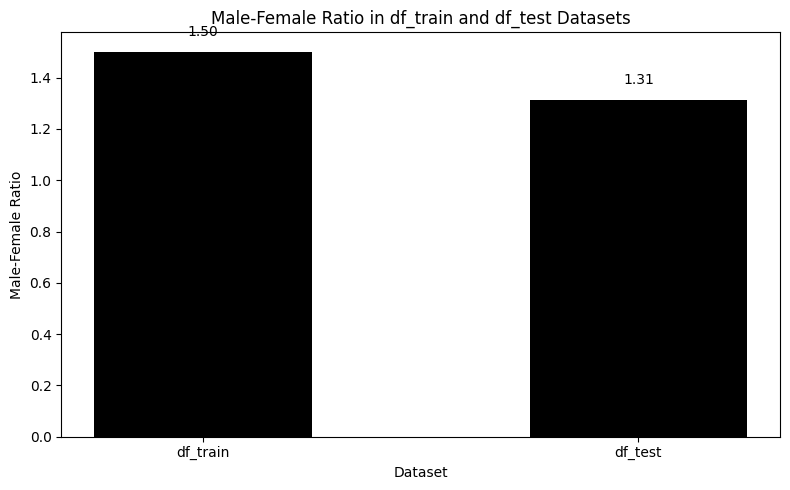

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

train_male_count = df_train[df_train['gender'] == 'Male'].shape[0]
train_female_count = df_train[df_train['gender'] == 'Female'].shape[0]

test_male_count = df_test[df_test['gender'] == 'Male'].shape[0]
test_female_count = df_test[df_test['gender'] == 'Female'].shape[0]

train_gender_ratio = train_male_count / train_female_count
test_gender_ratio = test_male_count / test_female_count

gender_ratios = [train_gender_ratio, test_gender_ratio]
data_labels = ['df_train', 'df_test']
bar_width = 0.5
index = range(len(data_labels))

ax.bar(index, gender_ratios, bar_width, color='k')

ax.set_title('Male-Female Ratio in df_train and df_test Datasets')
ax.set_xlabel('Dataset')
ax.set_ylabel('Male-Female Ratio')
ax.set_xticks(index)
ax.set_xticklabels(data_labels)

# Add data labels above each bar
def add_data_labels():
    for i, ratio in enumerate(gender_ratios):
        ax.text(i, ratio + 0.05, f'{ratio:.2f}', ha='center', va='bottom')

add_data_labels()

plt.tight_layout()
plt.show()


In [21]:
df_test.shape

(752, 4)

### <strong>Save dataframes</strong>

In [24]:
df_male.to_csv('df_male.csv', index=False)
df_female.to_csv('df_female.csv', index=False)
# df_train.to_csv('df_train.csv', index=False)
# df_test.to_csv('df_test.csv', index=False)